<a href="https://colab.research.google.com/github/phrasenmaeher/custom-audio-classification-tf/blob/main/custaudio_data_acquisition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download dataset


Code for section 1 of the post at
[TDS/Medium](https://towardsdatascience.com/custom-audio-classification-with-tensorflow-af8c16c38689)

Create the project directory

In [ ]:
!mkdir /content/drive/MyDrive/custaudio 

Also have a look at other audio datasets available at: http://www.openslr.org/resources.php

In [ ]:
!wget https://www.openslr.org/resources/12/train-clean-100.tar.gz

--2021-03-11 08:39:06--  https://www.openslr.org/resources/12/train-clean-100.tar.gz
Resolving www.openslr.org (www.openslr.org)... 46.101.158.64
Connecting to www.openslr.org (www.openslr.org)|46.101.158.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6387309499 (5.9G) [application/x-gzip]
Saving to: ‘train-clean-100.tar.gz’

train-clean-100.tar 100%[===================>]   5.95G  11.4MB/s    in 9m 12s  

2021-03-11 08:48:20 (11.0 MB/s) - ‘train-clean-100.tar.gz’ saved [6387309499/6387309499]



Extract dataset, choose an existing directory in your (mounted!) Google drive.

In [ ]:
!tar -xzf /content/train-clean-100.tar.gz --directory /content/drive/MyDrive/custaudio/

## Work on the data

Preview some samples

In [ ]:
import glob
import IPython
import random

files = glob.glob("/content/drive/MyDrive/custaudio/LibriSpeech/train-clean-100" + '/**/*.flac', recursive=True)

for audio in random.sample(files, 10):
  IPython.display.display(IPython.display.Audio(audio))

Generate a list of directories


In [ ]:
import os
import pickle

dataset_path = "/content/drive/MyDrive/custaudio/LibriSpeech/train-clean-100/"
dirs = os.listdir(dataset_path)

Load the file containing all speaker IDs and further information

In [ ]:
with open("/content/drive/MyDrive/custaudio/LibriSpeech/SPEAKERS.TXT", "r") as rf:
  text = rf.read()

Have a look at the text: We are looking for all speakers present in our data subset (train-clean-100)

In [ ]:
text

"; Some pipe(|) separated metadata about all LibriVox readers, whose work was used\n; in the corpus.\n;\n; The meaning of the fields in left-to-right order is as follows:\n;\n; reader_id: the ID of the reader in the LibriVox's database\n; gender: 'F' for female, 'M' for male\n; subset: the corpus subset to which the reader's audio is assigned\n; duration: total number of minutes of speech by the reader, included in the corpus\n; name: the name under which the reader is registered in LibriVox\n;\n;ID  |SEX| SUBSET           |MINUTES| NAME\n14   | F | train-clean-360  | 25.03 | Kristin LeMoine\n16   | F | train-clean-360  | 25.11 | Alys AtteWater\n17   | M | train-clean-360  | 25.04 | Gord Mackenzie\n19   | F | train-clean-100  | 25.19 | Kara Shallenberg\n20   | F | train-other-500  | 30.07 | Gesine\n22   | F | train-clean-360  | 25.14 | Michelle Crandall\n23   | F | train-clean-360  | 25.23 | Anita Roy Dobbs\n25   | M | train-other-500  | 30.16 | John Gonzalez\n26   | M | train-clean-10

After inspection, remove the first twelve lines, as they do not contain information that are neccessary for our task

In [ ]:
text = text.splitlines()
text = text[12:]

For the later data generation, we only want to use audio samples that are present in our dataset

In [ ]:
available_speakers = {}

Go over the lines; if this particular speaker ID is in our dataset save it for later

In [ ]:
print("Finding available speakers.")
for line in text:
  if "train-clean-100" in line:
    line = line.split("|")
    id = int(line[0])

    available_speakers[id] = line[1]

Finding available speakers.


Split the speakers into a male and female list

In [ ]:
male_speaker = []
female_speaker = []

for dir in dirs:
  gender = available_speakers[int(dir)]
  if gender == " M ":
    male_speaker.append(dataset_path+dir)
  else:
    female_speaker.append(dataset_path+dir)

In [ ]:
with open("/content/drive/MyDrive/custaudio/speaker.pkl", "wb") as wf:
  pickle.dump([male_speaker, female_speaker], wf)

That is it.

If you want to visualize some samples, try the following code

In [ ]:
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

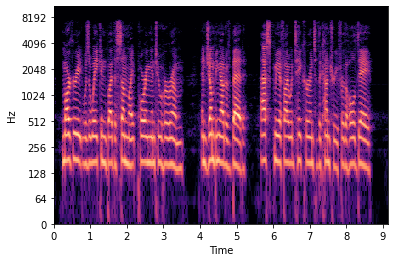

In [ ]:
y, sr = librosa.load(files[1])
D = librosa.stft(y)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
librosa.display.specshow(S_db, x_axis='time', y_axis='log')